In [155]:
import importlib

import numpy as np
import matplotlib.pyplot as plt

import BlackScholes
importlib.reload(BlackScholes)
from BlackScholes import BlackScholes

import Black76
importlib.reload(Black76)
from Black76 import Black76

## Checking put-call parity

In [63]:
model = Black76(sigma=0.2, r=0.05)

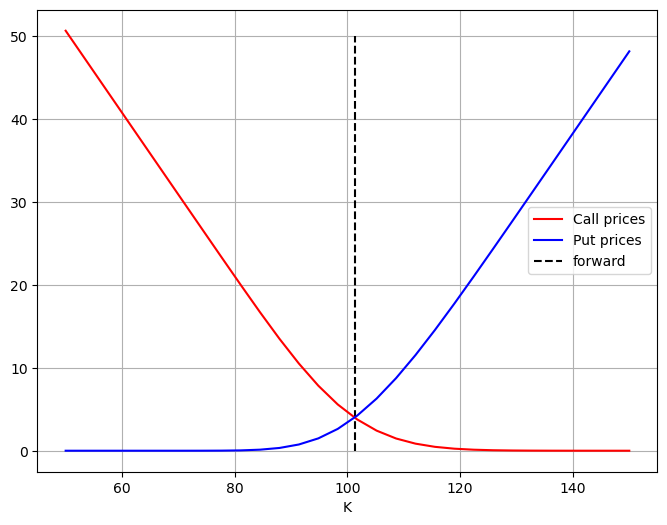

In [64]:
K = np.linspace(50, 150, 30)
S_0 = 100
T = 0.25
F_0 = S_0 * np.exp(model.r * T)

call_prices = model.vanilla_price(T=T, K=K, F=F_0, flag='c')
put_prices = model.vanilla_price(T=T, K=K, F=F_0, flag='p')

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(K, call_prices, "r", label='Call prices')
ax.plot(K, put_prices, "b", label='Put prices')
ax.vlines(F_0, 0, 50, 'k', ls='--', label='forward')
ax.grid()
ax.set_xlabel("K")
ax.legend()


## Pricing vanilla

In [65]:
S_0=92.800000
T=0.412000
K=93.720000
r=0.050000
q = 0
sigma=0.162700
flag = 'c'

F_0 = S_0 * np.exp((r - q) * T)

model = Black76(sigma=sigma, r=r)
model.vanilla_price(T, K, F_0, flag)

4.359612852647982

### Greeks

In [66]:
print('Option delta:', model.delta(T, K, F_0, flag))
print('Option gamma:', model.gamma(T, K, F_0))
print('Option vega:', model.vega(T, K, F_0))

Option delta: 0.5615933282031745
Option gamma: 0.04067319466713282
Option vega: 23.47950878091776


## Monte Carlo test for vanilla options

In [67]:
S_0=92.800000
T=0.412000
K=93.720000
r=0.050000
q = 0
sigma=0.162700
flag = 'c'

model = Black76(sigma=sigma, r=r)
model.vanilla_price(T, K, F_0, flag)

4.359612852647982

In [68]:
n_sample = 10**7
t_grid = np.array([T])
trajs = model.simulate_trajectory(n_sample, t_grid, F_0)

np.exp(-r * T) * np.maximum(trajs - K, 0).mean()

4.359941714921453

## Digital option

In [ ]:
S_0=94.520000
T=0.640000
K=90.320000
r=0.089000
sigma=0.124200
flag='c'

F_0 = S_0 * np.exp(r * T)

In [ ]:
model = Black76(sigma=sigma, r=r)
print('Digital option price =', model.digital_price(T, K, F_0, flag))

Digital option price = 0.7903866699232639


## Power option

The option with payoff $(F_T^p - K)_+$. Its price is given by the Black formula with $\hat \sigma = p\sigma$ and $\tilde F_0 = F_0^p\exp\left\{p\left(r - q - \dfrac{\sigma^2}{2}\right)T + \dfrac{\tilde\sigma^2}{2}T\right\}$.

In [119]:
def power_vanilla_Black(T, K, F_0, flag, sigma, r, p):
    sigma_tilde = p * sigma
    F_0_tilde = F_0**p * np.exp(-p * 0.5 * sigma**2 * T + 0.5 * sigma_tilde**2 * T)
    model = Black76(sigma=sigma_tilde, r=r)
    return model.vanilla_price(T, K, F_0_tilde, flag)

In [120]:
p=2
S_0=0.960000
T=0.412000
K=0.970000
r=0.050000
q=0.014000
sigma=0.131300
flag = 'c'

F_0 = S_0 * np.exp((r - q) * T)
print('Power option price =', power_vanilla_Black(T, K, F_0, flag, sigma, r, p))

Power option price = 0.056794487040136406


#### MC check

In [121]:
model = Black76(sigma=sigma, r=r)
n_sample = 10**7
t_grid = np.array([T])
trajs = model.simulate_trajectory(n_sample, t_grid, F_0)

print('Monte Carlo power option price =', np.exp(-r * T) * np.maximum(trajs**p - K, 0).mean())

Monte Carlo power option price = 0.056806824940471755


## Displaced log-normal model

Forward price dynamics:
$$
dF_t = \sigma (F_t + a)dW_t
$$
Vanilla option prices are given by the BS formula with $\tilde F_0 = F_0 + a, \tilde K = K + a$.

In [126]:
def dln_vanilla_Black(T, K, F_0, flag, sigma, r, a):
    F_0_tilde = F_0 + a
    K_tilde = K + a
    model = Black76(sigma=sigma, r=r)
    return model.vanilla_price(T, K_tilde, F_0_tilde, flag)

In [144]:
S_0=91.860000
T=0.850000
K=99.580000
sigma=0.114000
a=33.570000

flag = 'c'
r = 0
F_0 = S_0 * np.exp(r * T)

dln_vanilla_Black(T, K, F_0, flag, sigma, r, a)

2.4096926934499123

#### MC check

In [145]:
model = Black76(sigma=sigma, r=r)
n_sample = 10**7
t_grid = np.array([T])
trajs = model.simulate_trajectory(n_sample, t_grid, F_0)

np.exp(-r * T) * np.maximum(trajs * (1 + a / F_0) - a - K, 0).mean()

2.4111630612251926

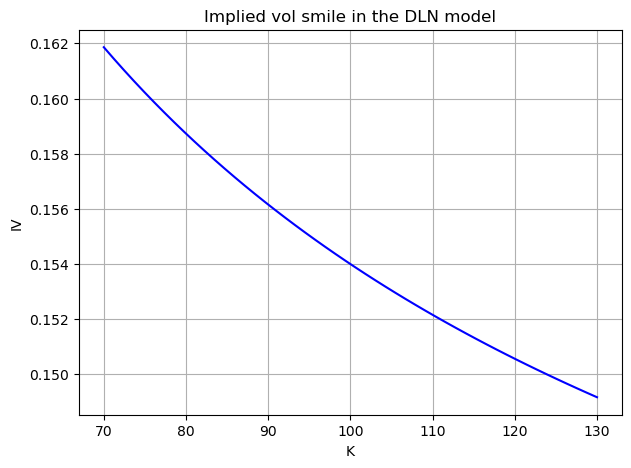

In [146]:
Ks = np.linspace(70, 130, 50)
flag = 'c'
IVs = []

for K in Ks:
    price_c = dln_vanilla_Black(T, K, F_0, flag, sigma, r, a)
    IVs.append(black_iv(price_c, T, K, F, r, flag))

fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(Ks, np.array(IVs), 'b')
ax.grid()
ax.set_xlabel('K')
ax.set_ylabel('IV')
ax.set_title('Implied vol smile in the DLN model')
plt.show()


## Implied volatility

In [ ]:
import implied_vol
importlib.reload(implied_vol)
from implied_vol import black_iv, black_scholes_iv, newton_init_vol

from Black76 import Black76

In [ ]:
S_0=91.480000
r=0.087000
q=0.032000
T=0.143000
K=90.530000
call_price=3.817701

flag = 'c'

F = np.exp((r - q) * T) * S_0

black_iv(call_price, T, K, F, r, flag)

array(0.21439998)

### Implied volatility testing

In [ ]:
r = 0.05
sigma = 0.25
S = 100
K = np.linspace(80, 120, 40)[None, :]
T = np.array([0.5, 1, 1.5, 2])[:, None]

F = S * np.exp(r * T)

model_BS = BlackScholes(sigma=sigma, r=r)
model_Black = Black76(sigma=sigma, r=r)

call_prices_BS = model_BS.vanilla_price(T, K, S, 'c')
call_prices_Black = model_Black.vanilla_price(T, K, S * np.exp(r * T), 'c')

print(f"Maximal absolute error for the option on the given grid:",
    max(
        np.max(np.abs(black_scholes_iv(call_prices_BS, T, K, S, r, 'c', method='Newton') - sigma)), 
        np.max(np.abs(black_iv(call_prices_Black, T, K, F, r, 'c', method='Newton') - sigma))
    )
)

Maximal absolute error for the option on the given grid: 9.498649089501043e-10


## 3d Black-Scholes simulation

In [ ]:
import importlib
import numpy as np
import BlackScholes
importlib.reload(BlackScholes)
from BlackScholes import BlackScholes

In [ ]:
rng = np.random.default_rng()

In [ ]:
rho = 0.90
r = 0.05
cov_mat = np.ones((3, 3)) * rho + (1 - rho) * np.eye(3)

model = BlackScholes(sigma=cov_mat, r=r)

In [ ]:
S_0 = np.ones(3) * 100
t_grid = np.linspace(0, 1, 10000)

trajs = model.simulate_trajectory(
    n_sample=20,
    t_grid=t_grid,
    init_val=S_0,
    random_state=rng
)

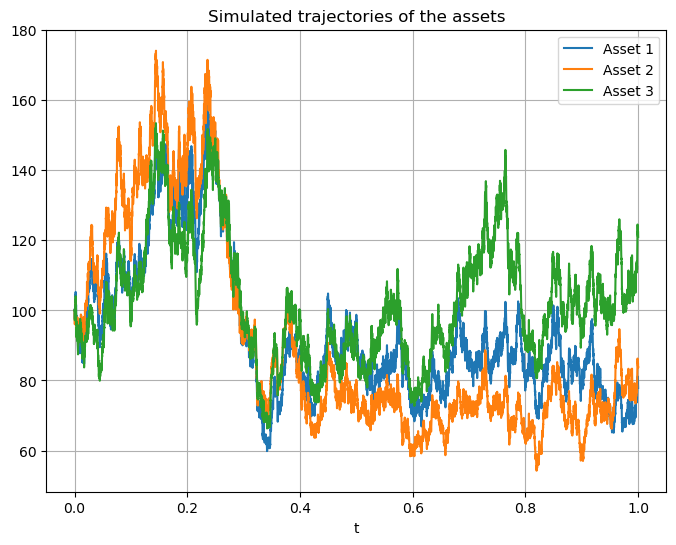

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

idx_traj = 0

ax.plot(t_grid, trajs[idx_traj, 0], label='Asset 1')
ax.plot(t_grid, trajs[idx_traj, 1], label='Asset 2')
ax.plot(t_grid, trajs[idx_traj, 2], label='Asset 3')
ax.set_title('Simulated trajectories of the assets')
ax.set_xlabel('t')
ax.legend()
ax.grid()

### Estimation of the covariance matrix

In [ ]:
dt = t_grid[1] - t_grid[0]
print('Estimated covariance matrix:\n', np.cov(np.diff(np.log(trajs) / np.sqrt(dt), axis=-1)[0]))
print('True covariance matrix:\n', cov_mat)

Estimated covariance matrix:
 [[1.020318   0.92243599 0.92041755]
 [0.92243599 1.02508815 0.92276726]
 [0.92041755 0.92276726 1.01885762]]
True covariance matrix:
 [[1.  0.9 0.9]
 [0.9 1.  0.9]
 [0.9 0.9 1. ]]
